In [1]:
import sys
import os
# Add to Python path Mitsuba python binding
sys.path.insert(0, os.path.abspath('../ext/mitsuba3/build/python'))

# Import the library using the alias "mi"
import mitsuba as mi
# Set the variant of the renderer
mi.set_variant('llvm_rgb')
# Import the package
import mitransient as mitr
# Load a scene
scene = mi.load_file(os.path.abspath('../scenes/cornell-box/cbox_mirror.xml'))
# Prepare transient storage
transient_integrator = scene.integrator()
transient_integrator.prepare_transient(scene, 0)
# Render the scene and develop the data
data_steady, data_transient = transient_integrator.render(scene)

[mitsuba] Warning: Couldn't import the ipywidgets package. Installing this package is required for the system to properly log messages and print in Jupyter notebooks!


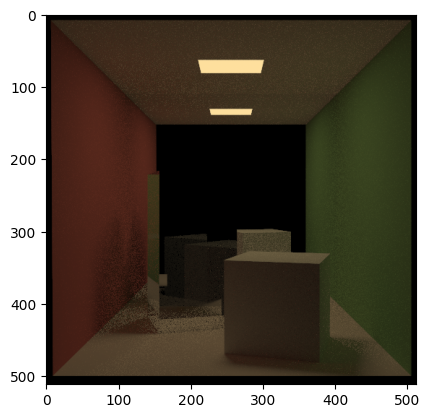

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow((data_steady / np.max(data_steady)) ** (1 / 4.0))
plt.show()

(512, 512, 400, 3)


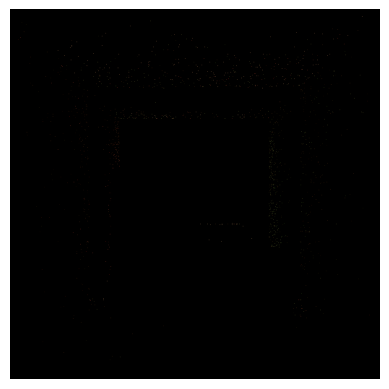

In [3]:
import numpy as np

data_max = np.max(data_transient)

print(data_transient.shape)

mitr.utils.show_video((np.moveaxis(data_transient, 0, 1) / data_max) ** (1.0 / 4.0), 2)
